Import Libraries

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pickle


Load the Dataset

In [25]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Explore the Dataset 

In [ ]:
print("Dataset Info:")
print(df.info())

print("\nNull values per column:")
print(df.isnull().sum())


🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object

Check distribution of categorical variables

In [17]:
print("Sex distribution:")
print(df['sex'].map({0: 'F', 1: 'M'}).value_counts())

print("\nStudy time:")
print(df['studytime'].value_counts())

print("\nFailures:")
print(df['failures'].value_counts())

print("\nAbsences (basic stats):")
print(df['absences'].describe())


Sex distribution:
Series([], Name: count, dtype: int64)

Study time:
studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

Failures:
failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

Absences (basic stats):
count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64


In [27]:
df['pass'] = df['G3'].apply(lambda g: 1 if g >= 10 else 0)

Distribution of G3

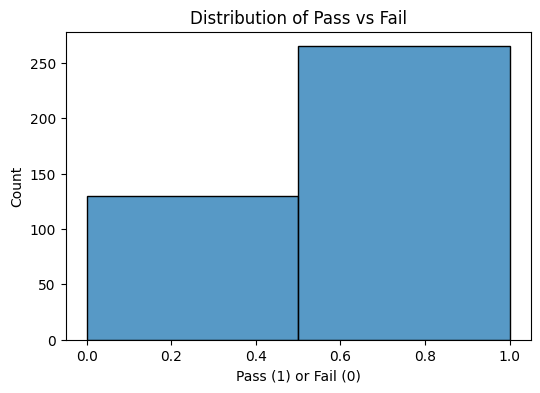

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(df['pass'], bins=2)
plt.title("Distribution of Pass vs Fail")
plt.xlabel("Pass (1) or Fail (0)")
plt.show()

Correlation heatmap

C:\Users\EJS\AppData\Local\Temp\ipykernel_15660\2984029463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


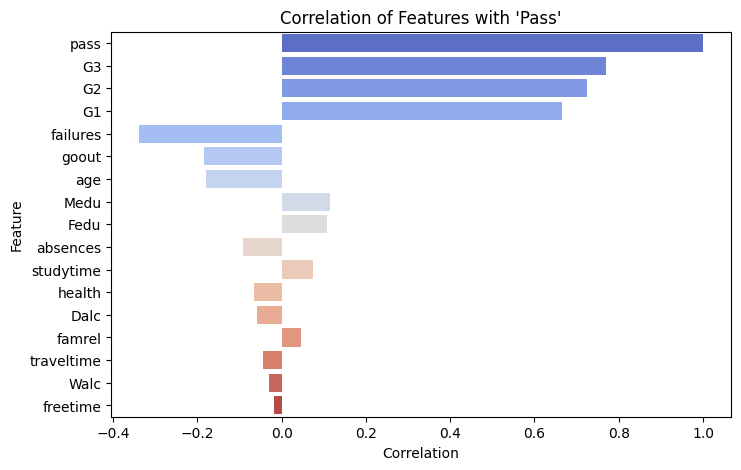

In [20]:
# Only keep correlations with 'pass' and sort
correlation_with_target = numeric_df.corr()['pass'].sort_values(key=abs, ascending=False)

# Plot a bar chart of top correlations with 'pass'
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title("Correlation of Features with 'Pass'")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


Detect Outliers

In [21]:
print("Absences - top 5 outliers:")
print(df.sort_values(by="absences", ascending=False).head())

Absences - top 5 outliers:
    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
276     GP   F   18       R     GT3       A     3     2    other  services   
183     GP   F   17       U     LE3       T     3     3    other     other   
74      GP   F   16       U     GT3       T     3     3    other  services   
315     GP   F   19       R     GT3       T     2     3    other     other   
307     GP   M   19       U     GT3       T     4     4  teacher  services   

     ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 pass  
276  ...        1     1     1     1       5       75  10   9   9    0  
183  ...        3     3     2     3       1       56   9   9   8    0  
74   ...        3     3     2     4       5       54  11  12  11    1  
315  ...        1     2     1     1       3       40  13  11  11    1  
307  ...        3     4     1     1       4       38   8   9   8    0  

[5 rows x 34 columns]


Clean and Select Features

In [ ]:
# Feature list
features = ['sex', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'goout', 'Medu', 'Fedu']
df_subset = df[features + ['pass']]

# Basic overview
print("Data Types:")
print(df_subset.dtypes)

print("\nUnique Values:")
for col in df_subset.columns:
    print(f"\n{col} → {df_subset[col].unique()}")


🔎 Data Types:
sex          object
age           int64
studytime     int64
failures      int64
absences      int64
G1            int64
G2            int64
goout         int64
Medu          int64
Fedu          int64
pass          int64
dtype: object

📊 Unique Values:

sex → ['F' 'M']

age → [18 17 15 16 19 22 20 21]

studytime → [2 3 1 4]

failures → [0 3 2 1]

absences → [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]

G1 → [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]

G2 → [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]

goout → [4 3 2 1 5]

Medu → [4 1 3 2 0]

Fedu → [4 1 2 3 0]

pass → [0 1]


In [ ]:

features = ['sex', 'age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'goout', 'Medu', 'Fedu']
df_subset = df[features + ['pass']].copy()

#Encode 'sex'
df_subset['sex'] = df_subset['sex'].map({'F': 0, 'M': 1})

#Define X and y
X = df_subset[features]
y = df_subset['pass']


In [31]:
print(df_subset.head())


   sex  age  studytime  failures  absences  G1  G2  goout  Medu  Fedu  pass
0    0   18          2         0         6   5   6      4     4     4     0
1    0   17          2         0         4   5   5      3     1     1     0
2    0   15          2         3        10   7   8      2     1     1     1
3    0   15          3         0         2  15  14      2     4     2     1
4    0   16          2         0         4   6  10      2     3     3     1


Split the Data

In [ ]:
# First split: train+val (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
# From X_temp (80%): split into 70% train, 10% val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)


Train the Model

Random Forest

In [ ]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Evaluate performance
train_acc = accuracy_score(y_train, train_preds)
val_acc = accuracy_score(y_val, val_preds)

In [40]:
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Validation Accuracy: {val_acc:.2f}")


Training Accuracy: 1.00
Validation Accuracy: 1.00


In [41]:
#classification report
print("\nClassification Report (Validation):")
print(classification_report(y_val, val_preds))


Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        27

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



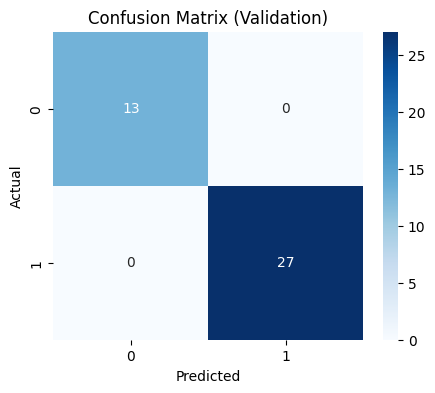

In [42]:
#confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:
test_preds = model.predict(X_test)
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_acc:.2f}")


Test Accuracy: 0.89


Logistic Regression 

In [46]:
# Train the logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predict on training and validation sets
log_train_preds = log_model.predict(X_train)
log_val_preds = log_model.predict(X_val)

In [52]:
# Accuracy
print(f"Training Accuracy: {accuracy_score(y_train, log_train_preds):.2f}")
print(f"Validation Accuracy: {accuracy_score(y_val, log_val_preds):.2f}")

Training Accuracy: 0.92
Validation Accuracy: 1.00


Random Forest - Test Accuracy: 0.89

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        26
           1       0.96      0.87      0.91        53

    accuracy                           0.89        79
   macro avg       0.87      0.90      0.88        79
weighted avg       0.90      0.89      0.89        79



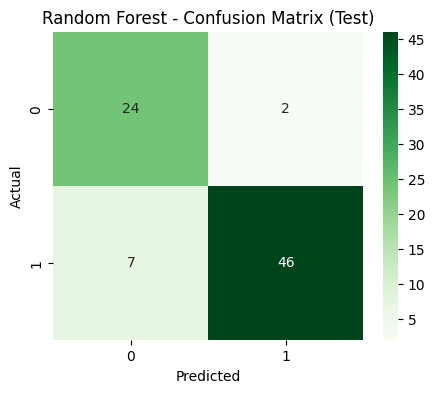

In [51]:
test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"Random Forest - Test Accuracy: {test_acc:.2f}")

print("\nClassification Report (Test):")
print(classification_report(y_test, test_preds))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGboost


In [59]:
# 1. Convert data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [60]:
# 2. Set parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 4,
    'seed': 42
}

In [61]:
# 3. Train the model and track history
evals_result = {}
model_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=10,
    evals=[(dtrain, 'train'), (dval, 'val')],
    evals_result=evals_result,
    verbose_eval=False
)

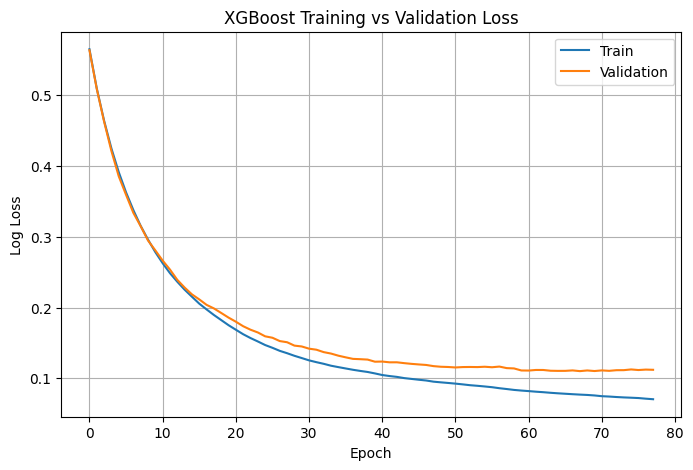

In [62]:
# 4. Plot training vs validation log loss
epochs = len(evals_result['train']['logloss'])
x_axis = range(epochs)

plt.figure(figsize=(8, 5))
plt.plot(x_axis, evals_result['train']['logloss'], label='Train')
plt.plot(x_axis, evals_result['val']['logloss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('XGBoost Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# 5. Evaluate on test set
test_preds = (model_xgb.predict(dtest) > 0.5).astype(int)
print(f"\nTest Accuracy: {accuracy_score(y_test, test_preds):.2f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, test_preds))


Test Accuracy: 0.91

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        26
           1       0.96      0.91      0.93        53

    accuracy                           0.91        79
   macro avg       0.89      0.91      0.90        79
weighted avg       0.92      0.91      0.91        79



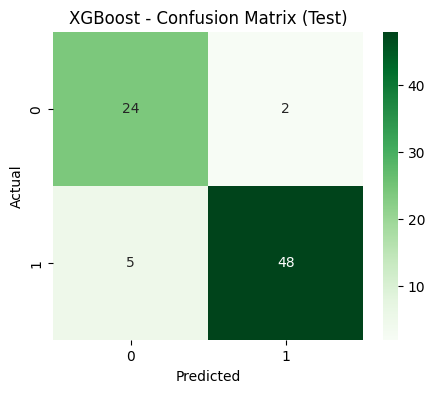

In [64]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Save the Model

In [66]:

# Save the XGBoost model as a pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(model_xgb, f)

print("XGBoost model saved as model.pkl")


XGBoost model saved as model.pkl


In [67]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


Load the Model

In [ ]:
# Load model
with open("model.pkl", "rb") as f:
    model_xgb = pickle.load(f)

# Load scaler
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Predict (after scaling input)
dnew = xgb.DMatrix(scaled_input)
pred = (model_xgb.predict(dnew) > 0.5).astype(int)
